# Laboratory exercise no. 3: Radiation Balance of the Earth
Katarzyna Wilk gr. 2

In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a_s = 0.19

In [3]:
def Temperature(A = 0.3, s = 1, c = 5.67e-8, i = 0.6):
    '''
    1. Perform a simple calculation of mean Earth temperature assuming that there is no
    atmosphere
    '''
    S = 1366*s
    return (S * 1/4 * (1-A) * 1/c * 1/i)**(1./4.)
    
def toCelcius(T):
    return T - 272.15

def toKelvin(T):
    return T + 272.15

def Atmosphere(vars,*S):
    '''
    2. Writing the programme code solving a set of nonlinear equations
    '''
    s= 0
    for i in S:
        s = str(i)
    S = float(s)
    #a_s = 0.19
    t_a = 0.53
    a_a = 0.3
    t_a2 = 0.06
    a_a2 = 0.31
    c = 2.7
    Ts, Ta = vars
    eq1 = (-t_a)*(1 - a_s)*(S*1366/4)+ c*(Ts - Ta) + 5.67e-8 * (Ts**4) * (1-a_a2) - 5.67e-8 * Ta**4  
    eq2 = -(1 - a_a - t_a + a_s * t_a)*(S*1366/4) - c*(Ts - Ta) - 5.67e-8*(Ts**4) * (1-t_a2 - a_a2) + 2* 5.67e-8*Ta**4
    
    return [eq1, eq2]

3. Calculation of the relationship between mean temperature and solar constant

In [4]:
Slist = np.linspace(0.6,1.2,13)
xlist = []
ylist = []
t = []
for s in Slist:
    x, y =  fsolve(Atmosphere, (1,1), args = (s))
    xlist.append(toCelcius(x))
    ylist.append(toCelcius(y))
    t.append(toCelcius(Temperature(s = s)))

4. Comparison of the results

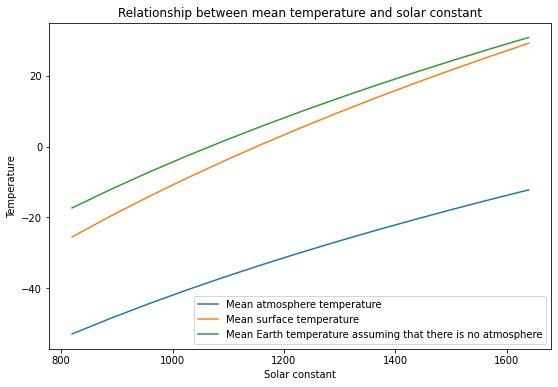

In [5]:
Slist = [i*1366 for i in Slist]
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
ax.plot(Slist,ylist, label = "Mean atmosphere temperature")
ax.plot(Slist,xlist, label="Mean surface temperature")
ax.plot(Slist,t,label = "Mean Earth temperature assuming that there is no atmosphere")
ax.legend()
ax.set_xlabel("Solar constant")
ax.set_ylabel('Temperature')
ax.set_title("Relationship between mean temperature and solar constant")
plt.show()

The average temperature of the atmosphere and surface are dependent on the solar constant. The higher the constant, the higher the temperature. The absence of an atmosphere inflates the temperature.In the model without an atmosphere 'i' was calculated at about 0.6. I used the 'fsolve' function from the scipy.optimize module to solve the nonlinear equations. Solar constant is 1366 * t, where t belongs to [0.8, 1.2]

5. Implementation of glaciation mechanism in the model ( Surface albedo depends on the temperature).
6. Calculation of solar constant values associated with the glacial-interglacial transition of the Earth system.

In [6]:
Slist = np.arange(0.6,1.45,0.05)
xlist1 = []
ylist1 = []
a_s = 0.7
for s in Slist:
    x, y =  fsolve(Atmosphere, (1,1), args = (s))
    xlist1.append(toCelcius(x))
    ylist1.append(toCelcius(y))
    if toCelcius(x) < -10:
        a_s = 0.7
    else:
        a_s = 0.19
        
xlist2 = []
ylist2 = []
a_s = 0.19
Slist = Slist[::-1]
for s in Slist:
    x, y =  fsolve(Atmosphere, (1,1), args = (s))
    xlist2.append(toCelcius(x))
    ylist2.append(toCelcius(y))
    if toCelcius(x) < -10:
        a_s = 0.7
    else:
        a_s = 0.19
        
xlist2.reverse()
ylist2.reverse()
Slist = Slist[::-1]
Slist = [i*1366 for i in Slist]

T1 = [sum(x) for x in zip(xlist1, ylist1)]
T1 = [x / 2 for x in T1]
T2 = [sum(x) for x in zip(xlist2, ylist2)]
T2 = [x / 2 for x in T2]

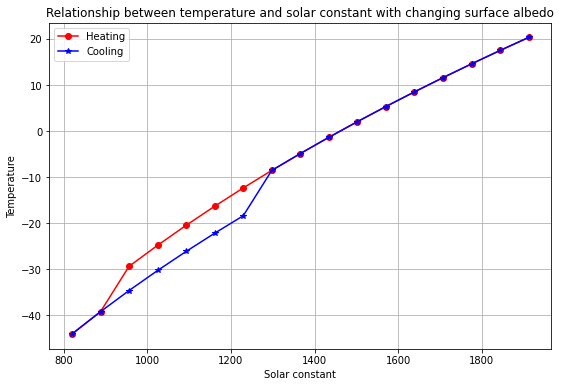

In [7]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
ax.plot(Slist,T2, 'o-r', label = "Heating")
ax.plot(Slist,T1,'*-b', label="Cooling")
ax.grid(True)
ax.legend()
ax.set_xlabel("Solar constant")
ax.set_ylabel('Temperature')
ax.set_title("Relationship between temperature and solar constant with changing surface albedo")
plt.show()

Our relationships are no longer linear. Albedo is changing at -10 degrees, when we simulate the apperance of snow and ice on the surface of our planet.

### Matlab code to python

1D model from the webpage translated to python

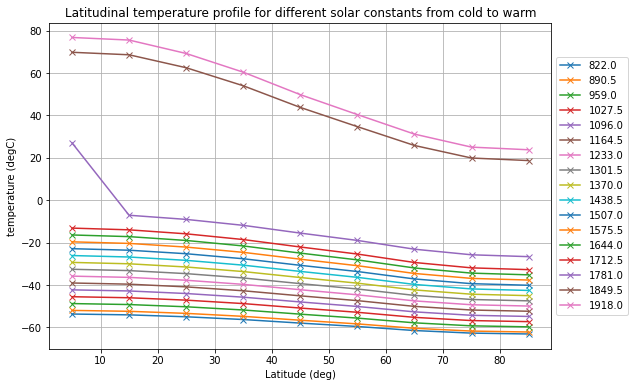

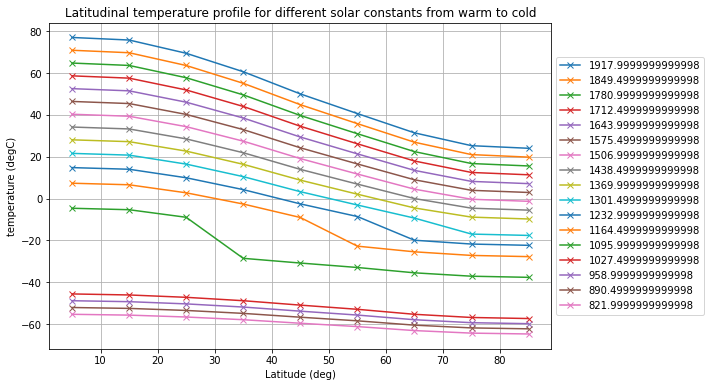

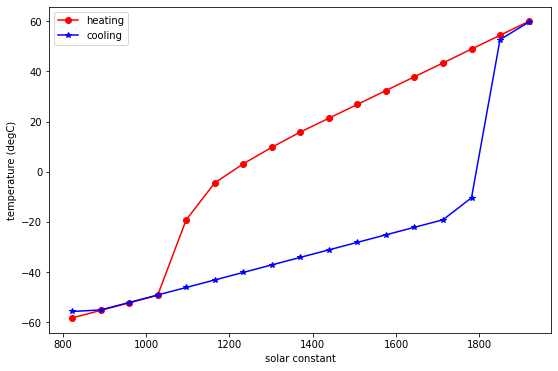

In [8]:
Alb_land = np.array([0.254, 0.248, 0.272, 0.309, 0.357, 0.407, 0.452, 0.5, 0.5])
# Albedo of ice
Alb_ice = 0.62
# Latitudinal mean coordinates
Latitude = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85]) * (2 * np.pi / 360)
XLatitude = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85])
# Earth surface area
P_earth = 4 * np.pi * 6370 ** 2
# Areas of latitudinal bands
P_lw = np.array([0.1739, 0.1686, 0.1582, 0.1430, 0.1234, 0.1001, 0.0738, 0.0452, 0.0152])
# Areas of latitudinal bands perpendicular to Sun position
P_sw = np.array([1.219, 1.189, 1.12, 1.021, 0.892, 0.77, 0.624, 0.531, 0.5])
# Critical temperature (snow ball effect)
T_ice = -10
# Model constants
A = 204
B = 2.17
C = 3.8
# Initial temperature
Ti = np.ones(9) * 10
# Solar constant (W/m2)
S = 1370
# Solar constant range and step for analysis
S_min = 0.6 * S
S_max = 1.4 * S
dS = 0.05 * S
XSS = np.arange(S_min, S_max + dS, dS)

# Loop from cold to warm
Ti_mean = []
Ti_mean1 = []
#plt.subplot(3, 1, 1)
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
for SS in XSS:
    for i in range(10):
        T_mean = np.sum(Ti * P_lw) / np.sum(P_lw)
        for lat in range(9):
            Si = P_sw[lat] * SS / 4
            if Ti[lat] > T_ice:
                Alb = Alb_land[lat]
            else:
                Alb = Alb_ice
            Ti[lat] = (Si * (1 - Alb) + C * T_mean - A) / (B + C)
    ax.plot(XLatitude, Ti, '-x', label = SS)
   
    Ti_mean1.append(T_mean)
    #print(SS)
ax.set_title('Latitudinal temperature profile for different solar constants from cold to warm')
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('temperature (degC)')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.pause(0.01)
plt.show()

# Loop from warm to cold
#plt.subplot(3, 1, 2)
Ti_mean = []
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
for SS in np.arange(S_max, S_min - dS, -dS):
    for i in range(100):
        T_mean = np.sum(Ti * P_lw)
        for lat in range(9):
            Si = P_sw[lat] * SS / 4
            if Ti[lat] > T_ice:
                Alb = Alb_land[lat]
            else:
                Alb = Alb_ice
            Ti[lat] = (Si * (1 - Alb) + C * T_mean - A) / (B + C)
    ax.plot(XLatitude, Ti, '-x', label = SS)
    
   
    Ti_mean.insert(0, T_mean)
    #print(SS)
ax.set_title('Latitudinal temperature profile for different solar constants from warm to cold')
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('temperature (degC)')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.pause(0.01)
plt.show()  

'''
plt.subplot(3, 1, 3)
plt.plot(XSS, Ti_mean, 'o-r')
plt.plot(XSS, Ti_mean1, '*-b')
plt.legend(['heating', 'cooling'], loc='upper left')
plt.grid(True)
plt.show()
'''
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
ax.plot(XSS, Ti_mean, 'o-r')
ax.plot(XSS, Ti_mean1, '*-b')
ax.legend(['heating', 'cooling'], loc='upper left')
ax.set_ylabel('temperature (degC)')
ax.set_xlabel('solar constant')
plt.show()

7. Comparison of results obtained in point 6 with the 1D model available for download on the webpage

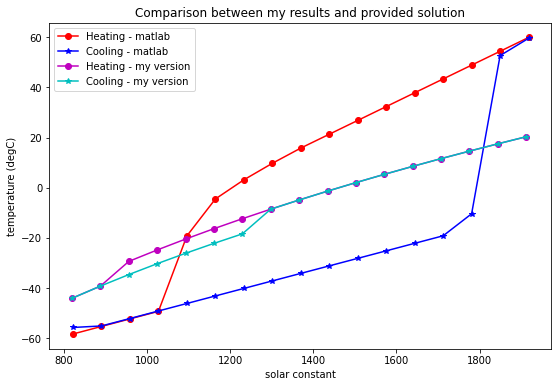

In [9]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot(111)
ax.plot(XSS, Ti_mean, 'o-r', label = "Heating - matlab")
ax.plot(XSS, Ti_mean1, '*-b', label = "Cooling - matlab")
ax.plot(Slist,T2, 'o-m', label = "Heating - my version")
ax.plot(Slist,T1,'*-c', label="Cooling - my version")
ax.legend(loc='upper left')
ax.set_ylabel('temperature (degC)')
ax.set_xlabel('solar constant')
ax.set_title("Comparison between my results and provided solution")
plt.show()

The results are quite different, propably because of different albedo values. In my model the temperature change looks more linear and less rapid. In the matlab version the histeresis is way wider.

# Conclusion

- The atmosphere has a significant impact on the temperature of our planet. 
- The solar constant is directly related to the average temperature. As the constant increases, the temperature increases. 
- Another variable that directly affects temperature is albedo. The higher the albedo, the lower the temperature because more light is reflected.